## Exploring CorEx on Recipe Topic Generation

Guide [here](https://github.com/gregversteeg/corex_topic/blob/master/corextopic/example/corex_topic_example.ipynb)



In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [2]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small.csv')

In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
df.head()

,title,ingredients,directions,link,source,NER
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [5]:
df['directions']=[x[2:-2] for x in df['directions']]

In [6]:
# Transform data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(df['directions'])
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(22311, 14199)

In [7]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

In [8]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(22311, 13830)

In [9]:
topic_model = ct.Corex(n_hidden=20, words=words, max_iter=200, verbose=False)
topic_model.fit(doc_word, words=words);

In [10]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: pepper, onion, garlic, sauce, season, onions, tender, saute, tomatoes, drain
1: sugar, vanilla, beat, cool, eggs, cream, chocolate, soda, mixer, batter
2: use, make, like, little, want, don, bit, note, recipe, need
3: dough, roll, center, comes, clean, surface, parchment, wire, inserted, paper
4: heat, medium, cook, stirring, saucepan, high, skillet, low, reduce, add
5: oven, preheat, bake, baking, degrees, sheet, rack, u00b0f, preheated, prepared
6: rest, air, prevent, care, touch, free, equal, tie, sticking, taking
7: oil, olive, taste, u00b0, vinegar, red, leaves, wine, chopped, liquid
8: bring, boil, simmer, water, pot, stock, boiling, salted, bay, dutch
9: aside, set, processor, room, temperature, food, transfer, using, whisk, just
10: place, half, sides, repeat, piece, sure, towel, leaving, away, making
11: cut, slice, pieces, slices, brush, grill, turn, peel, lengthwise, turning
12: flour, egg, butter, gradually, whites, yolks, powder, smooth, time, beating
13: juice, lemon, 

In [11]:
topic_model.tc

13.915259073731116

In [12]:
topic_model.tcs

array([1.62839616, 1.27621604, 1.21558295, 1.18628812, 0.95716013,
       0.82787045, 0.80587158, 0.69666544, 0.56629242, 0.54968984,
       0.53344036, 0.51981236, 0.51771778, 0.50175677, 0.42184744,
       0.41633109, 0.35711867, 0.34798408, 0.30307219, 0.28614519])

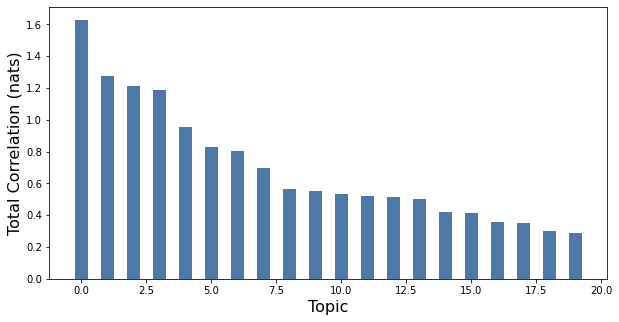

In [13]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [24]:
topic_model10 = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model10.fit(doc_word, words=words);

In [25]:
# Print all topics from the CorEx topic model
topics10 = topic_model10.get_topics()
for n,topic in enumerate(topics10):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: sugar, onion, vanilla, chicken, baking, flour, soda, green, chocolate, cheese
1: cup, tablespoons, teaspoon, tsp, cups, tbsp, tablespoon, teaspoons, ounces, oz
2: pepper, garlic, minced, black, ground, cloves, salt, tomatoes, sauce, chopped
3: olive, oil, fresh, virgin, freshly, extra, kosher, dried, cilantro, thyme
4: cut, leaves, bay, wine, leaf, inch, soy, pieces, sesame, stock
5: red, vinegar, butter, milk, beans, eggs, chili, mustard, peppers, melted
6: whip, pie, cool, pudding, graham, mix, whipped, cream, crust, cracker
7: purpose, room, temperature, packed, unsalted, brown, oats, granulated, firmly, yeast
8: juice, lemon, orange, lime, fat, low, zest, sodium, yogurt, reduced
9: thinly, sliced, peeled, large, spray, quartered, squash, vegetable, yellow, cored


In [26]:
topic_model10.tc

7.993253174446666

#### Notes:

Trying hierarchical

In [47]:
topic_model3 = ct.Corex(n_hidden=10, words=words)
topic_model3.fit(doc_word, words=words, anchors=[['sugar','soda','flour','powder','vanilla'],'tofu',\
                                                 ['chicken','beef','pork','seafood','shrimp','crab','fish']],\
                 anchor_strength=2);

In [48]:
topic_model3.tc

9.457210363725316

In [49]:
# Print all topics from the CorEx topic model
topics3 = topic_model3.get_topics()
for n,topic in enumerate(topics3):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: sugar, vanilla, flour, soda, baking, pepper, eggs, extract, powder, butter
1: olive, oil, fresh, red, black, cloves, virgin, freshly, leaves, extra
2: chicken, beef, garlic, sauce, pork, broth, minced, shrimp, ground, lb
3: fat, low, free, sodium, spray, reduced, cooking, use, recipe, follows
4: onion, green, chopped, tomatoes, sliced, onions, diced, celery, tomato, medium
5: whip, salt, cool, pudding, graham, mix, cake, whipped, cream, pineapple
6: juice, lemon, orange, lime, zest, rind, peel, juiced, mint, apple
7: cheese, cheddar, parmesan, shredded, grated, mozzarella, sharp, dressing, italian, jack
8: parsley, thyme, dried, leaf, bay, dijon, mustard, basil, flat, dill
9: cup, tablespoons, teaspoon, tsp, cups, tablespoon, tbsp, teaspoons, ounces, oz
